In [1]:
import numpy as np
import tensorflow as tf
from keras import layers, models
import matplotlib.pyplot as plt
from keras.datasets import mnist
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
y_train.shape, y_train[:5]

((60000,), array([5, 0, 4, 1, 9], dtype=uint8))

5


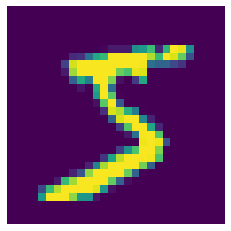

0


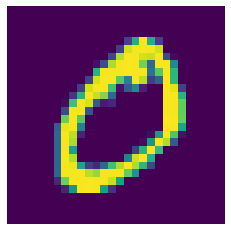

4


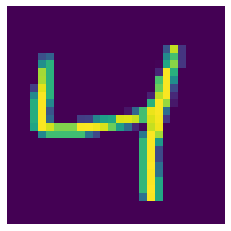

1


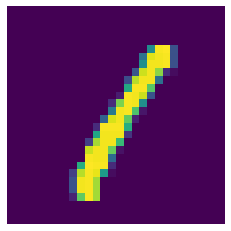

9


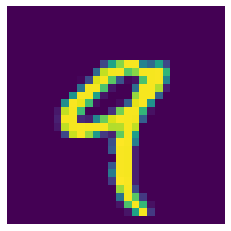

2


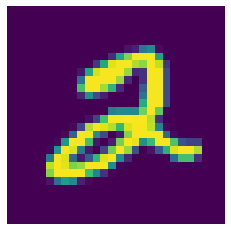

1


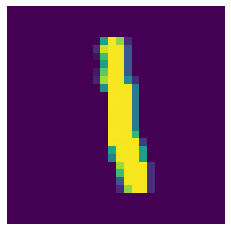

3


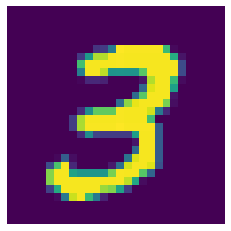

1


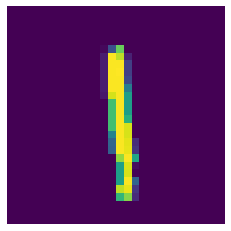

4


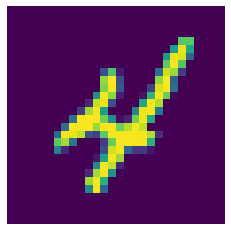

In [5]:
for i in range(10):
  plt.axis('off')
  plt.imshow(x_train[i])
  print(y_train[i])
  plt.show()

In [6]:
x_train =  x_train.reshape(-1, 28, 28, 1)
x_test =  x_test.reshape(-1, 28, 28, 1)

In [7]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [8]:
x_train[0], x_test[0]

(array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
  

In [9]:
x_train = x_train/255
x_test = x_test/255

In [10]:
x_train[0], x_test[0]

(array([[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],
 
        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
        

In [11]:
model = models.Sequential([
                           
                           
                           layers.Conv2D(filters=32, activation='relu', input_shape=(28, 28, 1), kernel_size=3),
                           layers.MaxPool2D(pool_size=2, strides=2),

                           layers.Conv2D(filters=64, activation='relu',kernel_size=3),
                           layers.MaxPool2D(pool_size=2, strides=2),

                           layers.Flatten(),

                           layers.Dense(units=128, activation='relu'),
                           layers.Dense(units=64, activation='relu'),
                           layers.Dense(units=10, activation='softmax'),


])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8

In [12]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['acc']
    )

model_history = model.fit(
    x_train, y_train, 
    validation_data=(x_test, y_test), 
    epochs=8, 
    batch_size=32
          )

Epoch 1/8
1875/1875 [==============================] - 9s 3ms/step - loss: 0.3292 - acc: 0.8984 - val_loss: 0.0721 - val_acc: 0.9763
Epoch 2/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0459 - acc: 0.9855 - val_loss: 0.0320 - val_acc: 0.9892
Epoch 3/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0301 - acc: 0.9903 - val_loss: 0.0309 - val_acc: 0.9892
Epoch 4/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0212 - acc: 0.9932 - val_loss: 0.0254 - val_acc: 0.9915
Epoch 5/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0165 - acc: 0.9947 - val_loss: 0.0343 - val_acc: 0.9890
Epoch 6/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0131 - acc: 0.9961 - val_loss: 0.0336 - val_acc: 0.9908
Epoch 7/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0109 - acc: 0.9964 - val_loss: 0.0412 - val_acc: 0.9883
Epoch 8/8
1875/1875 [==============================] - 5s 3ms/step - 

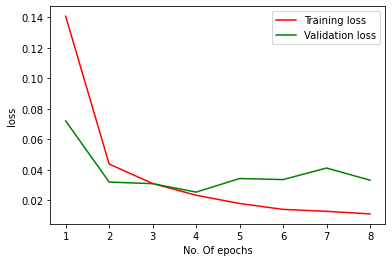

In [13]:
training_loss = model_history.history['loss']
validation_loss = model_history.history['val_loss']

epochs=range(1,9)
plt.plot(epochs, training_loss, 'r', label='Training loss')
plt.plot(epochs, validation_loss, 'g', label='Validation loss')
plt.ylabel('loss')
plt.xlabel('No. Of epochs')
plt.legend()
plt.show()

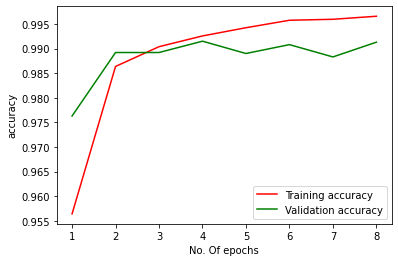

In [14]:
training_accuracy = model_history.history['acc']
validation_accuracy = model_history.history['val_acc']

epochs=range(1,9)
plt.plot(epochs, training_accuracy, 'r', label='Training accuracy')
plt.plot(epochs, validation_accuracy, 'g', label='Validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('No. Of epochs')
plt.legend()
plt.show()

In [15]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0332 - acc: 0.9913


[0.03320693224668503, 0.9912999868392944]

In [16]:
y_pred = model.predict(x_test)
y_pred  = [np.argmax(j) for j in y_pred]
y_pred[:5], y_test[:5]

([7, 2, 1, 0, 4], array([7, 2, 1, 0, 4], dtype=uint8))

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [18]:
print('Accuracy is : ', accuracy_score(y_test, y_pred))

Accuracy is :  0.9913


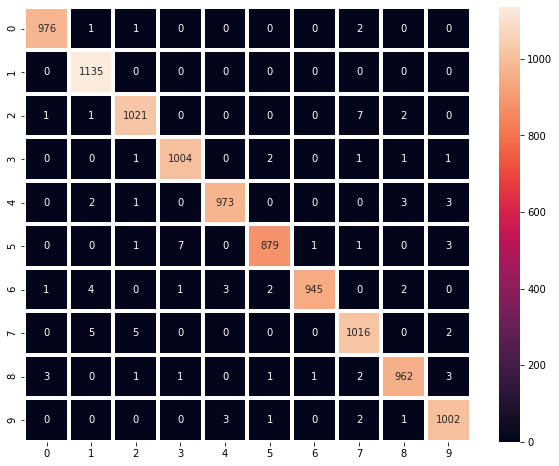

In [19]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, lw=3, fmt='d')
plt.show()